Import needed liberary

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

read data

In [3]:
test_data = pd.read_csv("/content/test_data.csv")
train_data=pd.read_csv("/content/train_data.csv")

In [4]:
train_data.head(8)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K



Data Analysis

In [5]:
num_train_records = train_data.shape[0]
num_test_records = test_data.shape[0]
print(f"Total number of train records: {num_train_records}")
print(f"Total number of test records: {num_test_records}")

Total number of train records: 32561
Total number of test records: 16281


Check for Null values in our data

In [6]:
train_data.isna().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

Check for duplicates

In [7]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

Check for values with ' ?'

In [8]:
col_names = train_data.columns
num_data = train_data.shape[0]
for c in col_names:
  num_non = train_data[c].isin([" ?"]).sum()
  if num_non > 0:
    print(c)
    print(num_non)
    print(f"{float(num_non)/num_data*100}%")
print("\n")
col_names = test_data.columns
num_data = test_data.shape[0]
for c in col_names:
  num_non = test_data[c].isin([" ?"]).sum()
  if num_non > 0:
    print(c)
    print(num_non)
    print(f"{float(num_non)/num_data*100}%")

workclass
1836
5.6428066508897565%
occupation
1843
5.664320619602299%
native-country
582
1.7887328272428313%


workclass
963
5.916687146719095%
occupation
966
5.935119193905136%
native-country
274
1.6834603096583929%


Replace missing values:
- in the workclass field with the mode value 'Private'
- in the occupation field with the mode value 'Other-service'
- in the occupation field with the mode value 'United-States'

In [9]:
train_data['workclass'].replace(' ?', 'Private', inplace=True)
test_data['workclass'].replace(' ?', 'Private', inplace=True)

train_data['occupation'].replace(' ?', 'Other-service', inplace=True)
test_data['occupation'].replace(' ?', 'Other-service', inplace=True)

train_data['native-country'].replace(' ?', 'United-States', inplace=True)
test_data['native-country'].replace(' ?', 'United-States', inplace=True)

In [10]:
test_data.head(8)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,Private,227026,HS-grad,9,Never-married,Other-service,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.


Drop irrelevant features

In [11]:
train_data.drop([ 'native-country','education','workclass','race'], axis=1, inplace=True)
test_data.drop([ 'native-country','education','workclass','race'], axis=1, inplace=True)

encoding using hot-encoding

In [12]:
#Separate the features (X) and the target variable (y) from the dataset:
X_train_encoded = train_data.drop('Income ', axis=1)  # Features
y = train_data['Income ']  # Target variable

#Encode the categorical features using one-hot encoding:
X_train_encoded = pd.get_dummies(X_train_encoded)
data_encoded=pd.get_dummies(X_train_encoded)

#Apply the chi-squared test to select the top k features:
selector = SelectKBest(score_func=chi2, k=10)  # Select top 10 features (adjust the value of k as needed)
X_new = selector.fit_transform(X_train_encoded, y)

# #Get the indices of the selected features:
selected_indices = selector.get_support(indices=True)

# #Get the names of the selected features:
selected_features = X_train_encoded.columns[selected_indices]

# print("Selected Features:")
print(selected_features)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'marital-status_ Married-civ-spouse',
       'marital-status_ Never-married', 'relationship_ Husband',
       'relationship_ Own-child'],
      dtype='object')


Label Encoding

In [13]:
# # Encode categorical features using Label Encoding
# categorical_features = ['occupation','sex','marital-status','relationship']
label_encoder = LabelEncoder()
# for feature in categorical_features:
#     train_data[feature] = label_encoder.fit_transform(train_data[feature])
# # Encode the target variable
test_data['Income '] = label_encoder.fit_transform(test_data['Income '])

SEX TO INCOME FIGURE

Text(0.5, 1.0, 'Sex to Income')

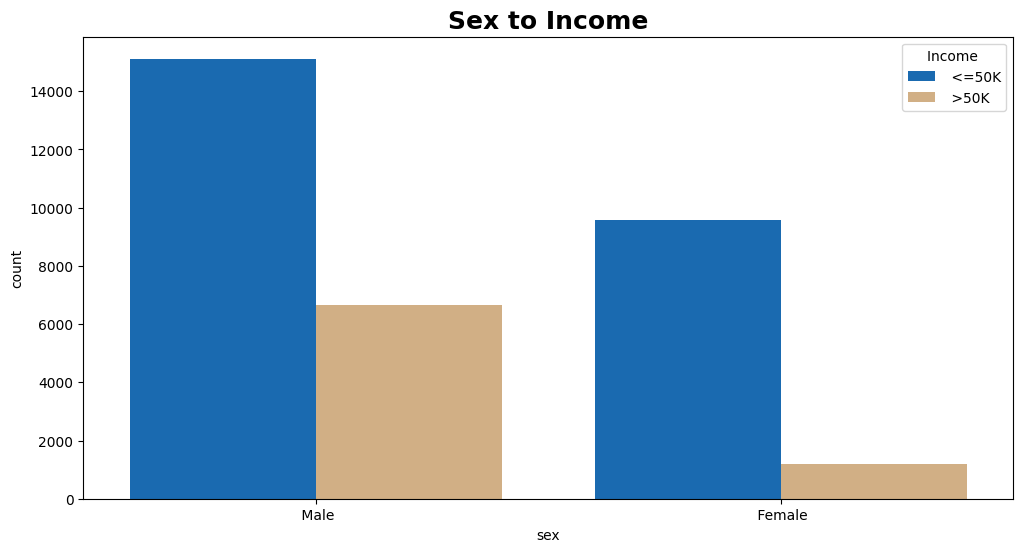

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_data['sex'], hue = train_data['Income '],palette=['#016CC9','#DEB078'])
plt.title('Sex to Income', fontsize=18, fontweight='bold')

Split the data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, train_data['Income '], test_size=0.2, random_state=42)

Models

In [16]:
#hyperparameters Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'sag', 'lbfgs', 'saga', 'liblinear', 'newton-cholesky']
}
lr = LogisticRegression()
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/d

Best Hyperparameters for Logistic Regression: {'C': 100, 'solver': 'newton-cg'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [17]:
#Logistic Regression
lr = LogisticRegression(**best_params)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_logReg=accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy on Test Data:',acc_logReg)
print('Logistic Regression Precision on Test Data:', precision_score(y_test, y_pred, pos_label=' >50K'))
print('Logistic Regression Recall on Test Data:', recall_score(y_test, y_pred,pos_label=' >50K'))
print('Logistic Regression F1-score on Test Data:', f1_score(y_test, y_pred,pos_label=' >50K'))
print('Logistic Regression Confusion Matrix on Test Data:')
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Logistic Regression Accuracy on Test Data: 0.8554087277197295
Logistic Regression Precision on Test Data: 0.7459138187221397
Logistic Regression Recall on Test Data: 0.6263256394260761
Logistic Regression F1-score on Test Data: 0.6809087826381824
Logistic Regression Confusion Matrix on Test Data:
[[4563  342]
 [ 599 1004]]


In [18]:
# Define hyperparameters SVM with limited range
param_grid = {
    'C': [0.1],
    'kernel': ['rbf']
}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters for SVM:", best_params)
svm = SVC(**best_params)
svm.fit(X_train, y_train)

Best Hyperparameters for SVM: {'C': 0.1, 'kernel': 'rbf'}


SVC(C=0.1)

In [19]:
# Evaluate the SVM model on the testing set
y_pred = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_svm)
precision = precision_score(y_test, y_pred,pos_label=' >50K')
recall = recall_score(y_test, y_pred,pos_label=' >50K')
f1 = f1_score(y_test, y_pred,pos_label=' >50K')
cm = confusion_matrix(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", cm)

Accuracy: 0.759680393362016
Precision: 0.975609756097561
Recall: 0.024953212726138492
F1-score: 0.04866180048661801
Confusion matrix:
 [[4904    1]
 [1563   40]]


In [20]:
#hyperparameters Decision Tree
dt = DecisionTreeClassifier()
#dt.fit(X_train, y_train)

# predicting on the training data
#y_pred = dt.predict(X_train)

  # Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate the Decision Tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_test, y_test)
best_params = grid_search.best_params_

print("Best Hyperparameters for Decision Tree:", best_params)

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 4}


In [21]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_Dtree=accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy on Test Data:', acc_Dtree)
print('Decision Tree Precision on Test Data:', precision_score(y_test, y_pred,pos_label=' >50K'))
print('Decision Tree Recall on Test Data:', recall_score(y_test, y_pred,pos_label=' >50K'))
print('Decision Tree F1-score on Test Data:', f1_score(y_test, y_pred,pos_label=' >50K'))
print('Decision Tree Confusion Matrix on Test Data:')
print(confusion_matrix(y_test, y_pred))

Decision Tree Accuracy on Test Data: 0.8070067609096496
Decision Tree Precision on Test Data: 0.6061162079510704
Decision Tree Recall on Test Data: 0.6182158452900811
Decision Tree F1-score on Test Data: 0.612106238418777
Decision Tree Confusion Matrix on Test Data:
[[4261  644]
 [ 612  991]]


Model	Scores

In [22]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'SVM',
              'Decision Tree'],
    'Score': [ acc_logReg*100,
              acc_svm*100
              , acc_Dtree*100]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,85.540873
2,Decision Tree,80.700676
1,SVM,75.968039


<Axes: title={'center': 'Model Score'}, xlabel='Score', ylabel='Percentage'>

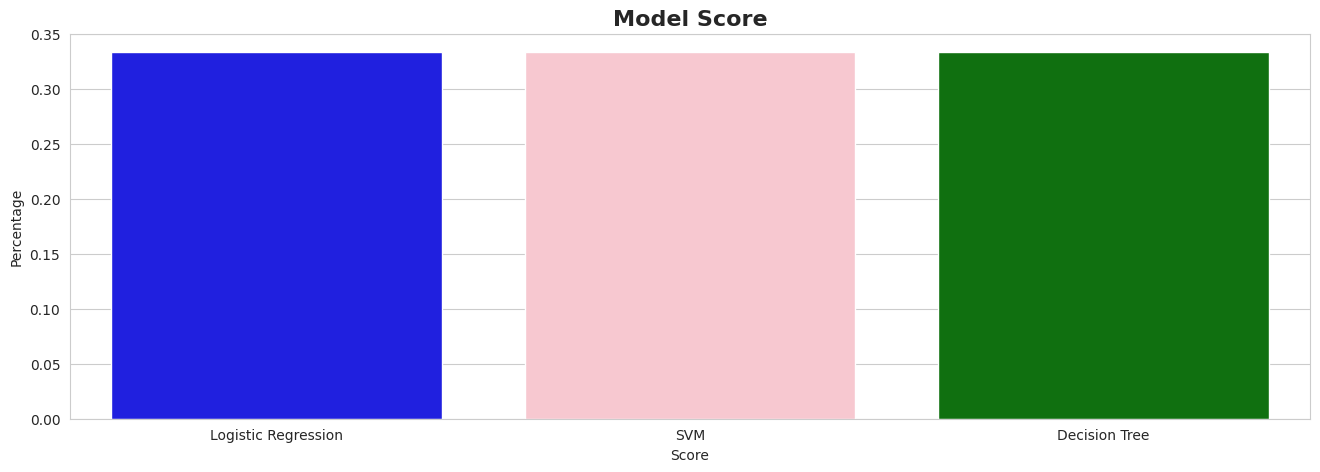

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,5))
plt.title('Model Score', fontsize=16, fontweight='bold')
score_percentage = models['Model'].value_counts(1).rename_axis('Score').reset_index(name = 'Percentage')
sns.barplot(x = 'Score', y = 'Percentage', data = score_percentage, palette=["blue","pink","green"])